In [12]:
from scipy import stats
import statistics as stat
edu_partialHighSchool = [30000, 10000, 10000, 20000, 70000, 30000, 10000, 20000, 10000, 30000]
edu_HighSchool = [20000, 30000, 60000, 20000, 40000, 60000, 60000]
edu_partialCollege = [60000, 40000, 30000, 130000, 60000, 40000]
edu_Bachelors = [40000, 20000, 90000, 120000, 60000, 130000, 10000, 20000, 100000, 120000]
edu_Graduate = [30000, 10000, 10000, 20000, 70000, 30000, 10000, 20000, 10000, 30000]

print('PartiaL High School  : '+ str(int(stat.mean(edu_partialHighSchool))))
print('High School          : '+ str(int(stat.mean(edu_HighSchool))))
print('PartiaL College      : '+ str(int(stat.mean(edu_partialCollege))))
print('Bachelors            : '+ str(int(stat.mean(edu_Bachelors))))
print('Graduate             : '+ str(int(stat.mean(edu_Graduate))))


PartiaL High School  : 24000
High School          : 41428
PartiaL College      : 60000
Bachelors            : 71000
Graduate             : 24000


In [13]:
t, p = stats.ttest_ind(edu_partialHighSchool, edu_HighSchool)

print(f"t-value: {t}")
print(f"p-value: {p}")

t-value: -1.9131753750607223
p-value: 0.07500898731578687


C:\Users\DELL\AppData\Local\Temp\ipykernel_13496\2140230057.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_partialHighSchool, label="Partial High School")
C:\Users\DELL\AppData\Local\Temp\ipykernel_13496\2140230057.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_HighSchool, labe

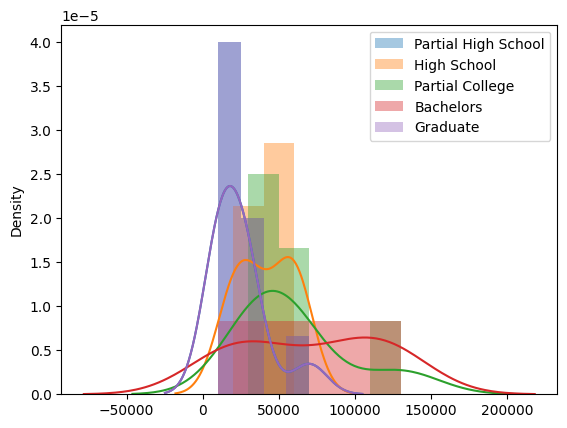

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.distplot(edu_partialHighSchool, label="Partial High School")
sns.distplot(edu_HighSchool, label="High School");
sns.distplot(edu_partialCollege, label="Partial College")
sns.distplot(edu_Bachelors, label="Bachelors")
sns.distplot(edu_Graduate, label="Graduate")
plt.legend();

In [24]:
f,p = stats.f_oneway(edu_Bachelors, edu_Graduate, edu_partialHighSchool, edu_partialCollege, edu_HighSchool)
print(f'f-value: {f}')
print(f'p-value: {p}')

f-value: 4.661684109254511
p-value: 0.0036826742003928936


In [7]:
import pandas as pd

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


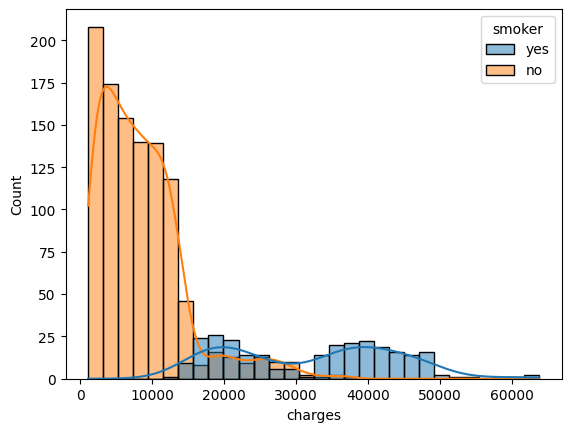

In [15]:
sns.histplot(data=df, x="charges",hue="smoker", kde='True');

In [8]:
smoker_y = df[df['smoker'] == 'yes']
smoker_n = df[df['smoker'] == 'no']

stats.ttest_ind(smoker_y['charges'], smoker_n['charges'])

TtestResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283, df=1336.0)

In [26]:
def anova(feature, label):
    groups = df[feature].unique()
    grouped_values = []
    for group in groups :
        grouped_values.append(df[df[feature] == group][label])
    
    return stats.f_oneway(*grouped_values)


F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)


In [28]:
anova('sex', 'charges')

F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)

In [29]:
df = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv')
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [31]:
df.Education.unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [40]:
df['Education_rank'] = df['Education']
df.Education_rank.replace(['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],[1,2,3,4,5], inplace=True)
df.Education_rank

C:\Users\DELL\AppData\Local\Temp\ipykernel_13496\2273505905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Education_rank.replace(['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],[1,2,3,4,5], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13496\2273505905.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beh

0      4
1      4
2      4
3      4
4      4
      ..
995    1
996    1
997    1
998    1
999    1
Name: Education_rank, Length: 1000, dtype: int64